In [1]:
# 1. Preprocessing Datasets

In [2]:
# import libraries

import torchvision
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_tensor, to_pil_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import tensorflow as tf
import cv2 as cv
import random
import matplotlib.pyplot as plt

2025-04-07 13:56:02.687223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744001762.756195   31027 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744001762.771893   31027 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744001762.891043   31027 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744001762.891071   31027 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744001762.891073   31027 computation_placer.cc:177] computation placer alr

In [3]:
# call Pascal VOC 2012 Dataset

train_dataset = torchvision.datasets.VOCDetection("PascalVOC2012/", year='2012', image_set='train', download=True)
test_dataset = torchvision.datasets.VOCDetection("PascalVOC2012/", year='2012', image_set='val', download=True)

Using downloaded and verified file: PascalVOC2012/VOCtrainval_11-May-2012.tar
Extracting PascalVOC2012/VOCtrainval_11-May-2012.tar to PascalVOC2012/
Using downloaded and verified file: PascalVOC2012/VOCtrainval_11-May-2012.tar
Extracting PascalVOC2012/VOCtrainval_11-May-2012.tar to PascalVOC2012/


In [4]:
print(train_dataset)
print(train_dataset[0][0])
print(train_dataset[0][1])

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: PascalVOC2012/
<PIL.Image.Image image mode=RGB size=500x442 at 0x7F2B2F703070>
{'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}


In [5]:
print(train_dataset[0][0])
print(train_dataset[1][0])

<PIL.Image.Image image mode=RGB size=500x442 at 0x7F2B98B518A0>
<PIL.Image.Image image mode=RGB size=500x327 at 0x7F2B98B51660>


In [6]:
# 데이터셋 전처리 1 - 이미지, 바운딩 박스 크기 resize 하기

In [7]:
import os

VOC_ROOT_DIR = './PascalVOC2012/VOCdevkit/VOC2012'
Annotation_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
Image_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

img shape: (281, 500, 3)


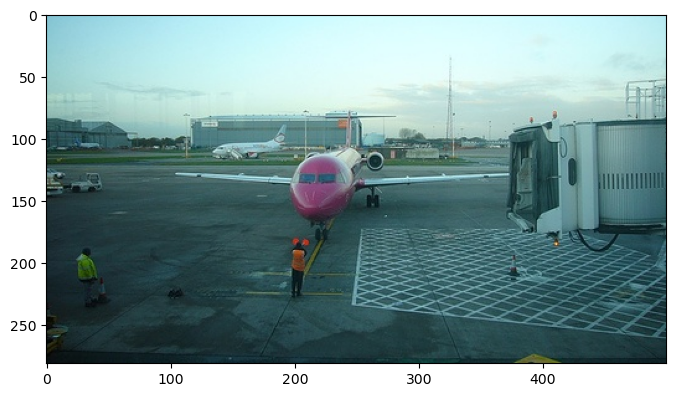

In [8]:
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread(os.path.join(Image_DIR, '2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [9]:
test_xml_path = os.path.join(Annotation_DIR, '2007_000032.xml')

In [10]:
print(test_xml_path)

./PascalVOC2012/VOCdevkit/VOC2012/Annotations/2007_000032.xml


In [11]:
# size : xml 파일과 대응되는 이미지의 width, height, channels 정보에 대한 tag
# object : xml 파일과 대응되는 이미지 속에 object의 정보에 대한 tag
# name : 클래스 이름에 대한 tag 
# bndbox : 해당 오브젝트의 바운딩 박스에 대한 tag

!cat {test_xml_path}

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

In [12]:
# xml Parsing Test
# 출처 : https://velog.io/@kyungmin1029/CV-OpenCV

import xml.etree.ElementTree as ET # 이걸 이용해 파싱. 

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(test_xml_path) # 부모-자식 트리가 생성 (root 밑에 object 들이 있는 구조)
root = tree.getroot() # 루트를 가져올 수 있음 (annotation)

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text # -> 자식 중 filename 이라는 노드를 찾음.
full_image_name = os.path.join(Image_DIR, image_name) # 이미지까지 포함한 절대경로 
image_size = root.find('size') # -> 자식 중 size 찾음 
image_width = int(image_size.find('width').text) # size 를 찾고 그 자식노드인 width 를 찾아야 함. 
image_height = int(image_size.find('height').text) # size 를 찾고 그 자식노드인 height 를 찾아야 함. 

# 파일 내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'): # -> 모든 object 를 찾고 반복문 돌림 (지금은 4개)
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2) # 바운딩박스와
    class_name=obj.find('name').text # 이름을 찾고 
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos} # 딕셔너리를 만들어
    objects_list.append(object_dict) # 리스트에 더해줌. (object 하나에 딕셔너리 하나)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)

full_image_name: ./PascalVOC2012/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


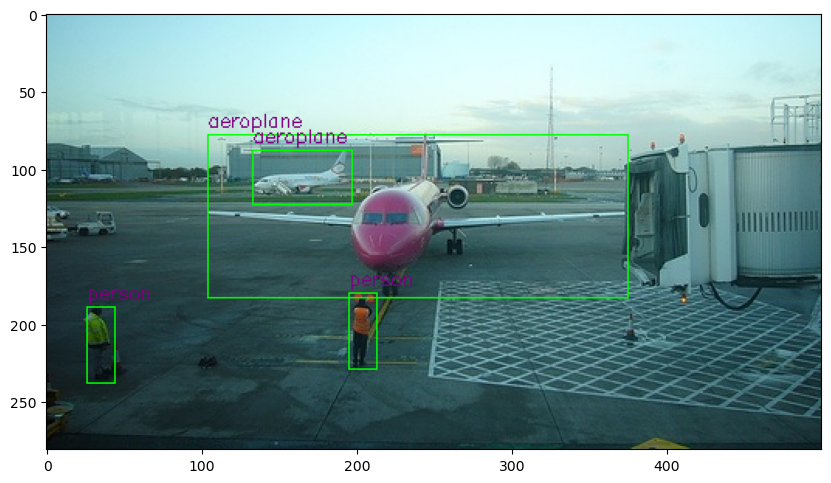

In [13]:
# Visualizing Boundingbox test
# 출처 : https://velog.io/@kyungmin1029/CV-OpenCV

xml_file = os.path.join(Annotation_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(Image_DIR, image_name)

img = cv2.imread(full_image_name)
# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = img.copy()

# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)
blue_color=(255, 0, 0)
purple_color=(128, 0, 127)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    # 네모 그리는 인자 (사진, 좌상단, 우하단, 색, thickness)
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    # text 삽입 인자 (사진, 쓸 텍스트, 텍스트 위치, 폰트.. )
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, purple_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

In [14]:
# 중요!! PascalVOC Dataset의 경우는 입력 이미지의 크기가 모두 다르다. 우리가 사용할 모델의 경우 W, H 값을 256 , 256, GHN, GWN 값을 8, 8로 고정하였기 때문에
# 모든 이미지의 크기를 256*256으로 맞춰줄 필요가 있다. 이는 cv2.resize()로 할 수 있는데, 문제는 이렇게 할 경우 바운딩 박스의 위치, 사이즈도 달라진다.
# 따라서 이에 대해서도 resize를 해줄 필요가 있다.

pre_img shape: (281, 500, 3), resized_img shape : (256, 256, 3)


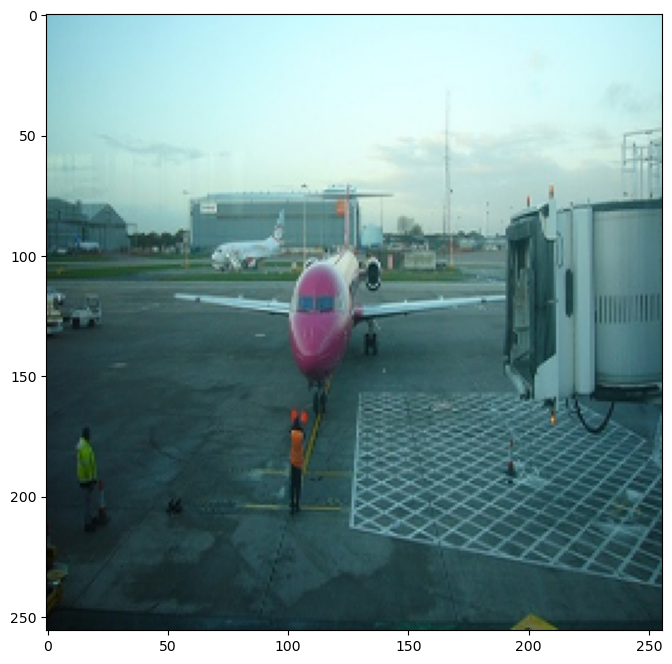

In [15]:
import cv2
import matplotlib.pyplot as plt
import os

pre_img_path = os.path.join(Image_DIR, '2007_000032.jpg')
pre_img = cv2.imread(pre_img_path)

resized_img = cv2.resize(pre_img, (256,256))
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

print(f'pre_img shape: {pre_img.shape}, resized_img shape : {resized_img.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(resized_img_rgb)
plt.show()

In [16]:
# 전처리 전 이미지와 전처리 후 이미지의 종횡비를 구하고, 해당 비를 바운딩 박스의 정보에 곱해주기

import xml.etree.ElementTree as ET # 이걸 이용해 파싱. 

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(test_xml_path) # 부모-자식 트리가 생성 (root 밑에 object 들이 있는 구조)
root = tree.getroot() # 루트를 가져올 수 있음 (annotation)

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text # -> 자식 중 filename 이라는 노드를 찾음.
full_image_name = os.path.join(Image_DIR, image_name) # 이미지까지 포함한 절대경로 

image_size = root.find('size') # -> 자식 중 size 찾음 
preprocessed_image_width = int(image_size.find('width').text) # size 를 찾고 그 자식노드인 width 를 찾아야 함. 
preprocessed_image_height = int(image_size.find('height').text) # size 를 찾고 그 자식노드인 height 를 찾아야 함. 

width_ratio = 256 / preprocessed_image_width
height_ratio = 256 / preprocessed_image_height

print(width_ratio)
print(height_ratio)

# 파일 내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'): # -> 모든 object 를 찾고 반복문 돌림 (지금은 4개)
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 -> 이후 종횡비 곱해주기
    x1 = int(float(xmlbox.find('xmin').text) * width_ratio)
    y1 = int(float(xmlbox.find('ymin').text) * height_ratio)
    x2 = int(float(xmlbox.find('xmax').text) * width_ratio)
    y2 = int(float(xmlbox.find('ymax').text) * height_ratio)
    
    bndbox_pos = (x1, y1, x2, y2) # 바운딩박스와
    class_name=obj.find('name').text # 이름을 찾고 
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos} # 딕셔너리를 만들어
    objects_list.append(object_dict) # 리스트에 더해줌. (object 하나에 딕셔너리 하나)
    
for object in objects_list:
    print(object)

0.512
0.9110320284697508
{'class_name': 'aeroplane', 'bndbox_pos': (53, 71, 192, 166)}
{'class_name': 'aeroplane', 'bndbox_pos': (68, 80, 100, 112)}
{'class_name': 'person', 'bndbox_pos': (99, 163, 109, 208)}
{'class_name': 'person', 'bndbox_pos': (13, 172, 22, 216)}


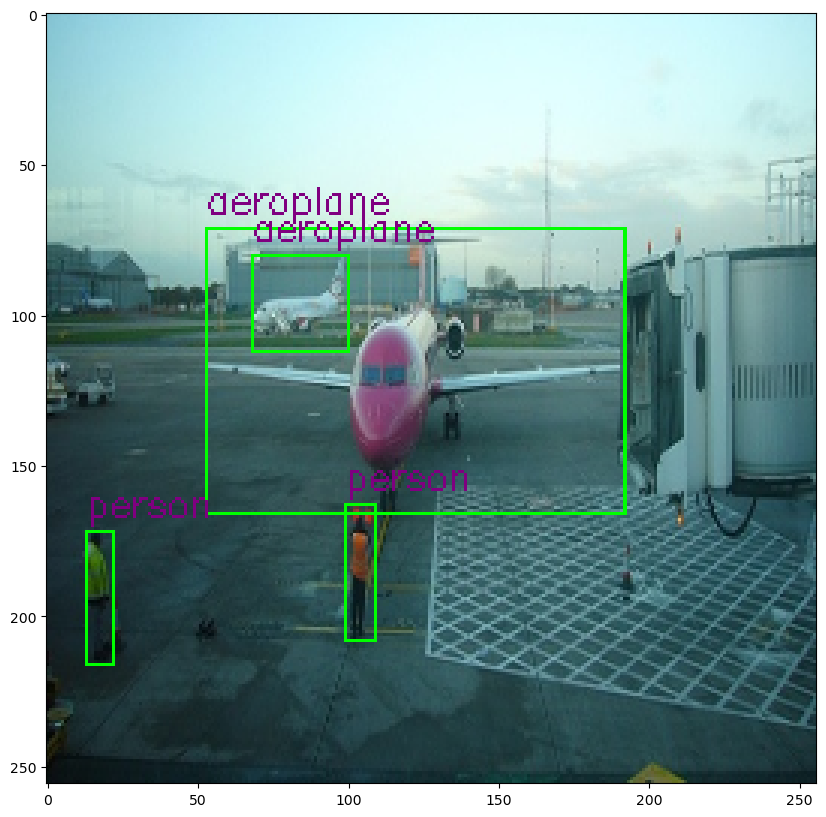

In [17]:
# Visualizing Boundingbox test
# 출처 : https://velog.io/@kyungmin1029/CV-OpenCV

xml_file = os.path.join(Annotation_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
pre_image_name = os.path.join(Image_DIR, image_name)
pre_img = cv2.imread(full_image_name)

preprocessed_image_width = int(image_size.find('width').text) # size 를 찾고 그 자식노드인 width 를 찾아야 함. 
preprocessed_image_height = int(image_size.find('height').text) # size 를 찾고 그 자식노드인 height 를 찾아야 함. 

width_ratio = 256 / preprocessed_image_width
height_ratio = 256 / preprocessed_image_height

resized_img = cv2.resize(pre_img, (256,256))
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = resized_img.copy()

# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)
blue_color=(255, 0, 0)
purple_color=(128, 0, 127)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(float(xmlbox.find('xmin').text) * width_ratio)
    top = int(float(xmlbox.find('ymin').text) * height_ratio)
    right = int(float(xmlbox.find('xmax').text) * width_ratio)
    bottom = int(float(xmlbox.find('ymax').text) * height_ratio)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    # 네모 그리는 인자 (사진, 좌상단, 우하단, 색, thickness)
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    # text 삽입 인자 (사진, 쓸 텍스트, 텍스트 위치, 폰트.. )
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, purple_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

In [18]:
# 데이터 셋 전처리 2 : 목표로 하는 데이터셋은 aeroplane, bicycle, bus, car, cat 중 하나라도 들어가 있는 데이터 셋이므로
# 위 5개의 클래스가 존재하는 데이터 셋에 대해서만 train_subset_dataset, test_subset_dataset을 구성하기

In [19]:
print(train_dataset)
print(train_dataset[0][0])
print(train_dataset[0][1])

print(type(train_dataset[0][1])) # 데이터 타입이 딕셔너리로 되어있음을 알 수 있음

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: PascalVOC2012/
<PIL.Image.Image image mode=RGB size=500x442 at 0x7F2B2D122EC0>
{'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}
<class 'dict'>


In [20]:
import os

VOC_ROOT_DIR = './PascalVOC2012/VOCdevkit/VOC2012'
Annotation_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
Image_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

In [21]:
train_img_name = train_dataset[0][1]['annotation']['filename']
print(train_img_name)

splitted_train_img_name, splitted_file_extension = os.path.splitext(train_img_name)
print(splitted_train_img_name)

train_img_xml_path = os.path.join(f'{splitted_train_img_name}.xml')

full_train_img_xml_path = os.path.join(Annotation_DIR, train_img_xml_path)
print(full_train_img_xml_path)

2008_000008.jpg
2008_000008
./PascalVOC2012/VOCdevkit/VOC2012/Annotations/2008_000008.xml


In [22]:
!cat {full_train_img_xml_path}

<annotation>
	<folder>VOC2012</folder>
	<filename>2008_000008.jpg</filename>
	<source>
		<database>The VOC2008 Database</database>
		<annotation>PASCAL VOC2008</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>442</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>horse</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<occluded>1</occluded>
		<bndbox>
			<xmin>53</xmin>
			<ymin>87</ymin>
			<xmax>471</xmax>
			<ymax>420</ymax>
		</bndbox>
		<difficult>0</difficult>
	</object>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<occluded>0</occluded>
		<bndbox>
			<xmin>158</xmin>
			<ymin>44</ymin>
			<xmax>289</xmax>
			<ymax>167</ymax>
		</bndbox>
		<difficult>0</difficult>
	</object>
</annotation>


In [23]:
# xml Parsing Test
# 출처 : https://velog.io/@kyungmin1029/CV-OpenCV

import xml.etree.ElementTree as ET # 이걸 이용해 파싱. 

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(full_train_img_xml_path) # 부모-자식 트리가 생성 (root 밑에 object 들이 있는 구조)
root = tree.getroot() # 루트를 가져올 수 있음 (annotation)

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text # -> 자식 중 filename 이라는 노드를 찾음.
print(image_name)

full_image_name = os.path.join(Image_DIR, image_name) # 이미지까지 포함한 절대경로 
print(full_image_name)

# 관심 클래스 정의
target_classes = ['aeroplane', 'bicycle', 'bus', 'car', 'cat']

# 파일 내에 있는 모든 object Element를 찾음.
train_img_subset_path = []

print(train_img_subset_path)

for obj in root.findall('object'): # -> 모든 object 를 찾고 반복문 돌림
    class_name=obj.find('name').text
    
    if class_name in target_classes :
        train_img_subset_path.append(image_name)
        break

print(train_img_subset_path)

2008_000008.jpg
./PascalVOC2012/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
[]
[]


img shape: (442, 500, 3)


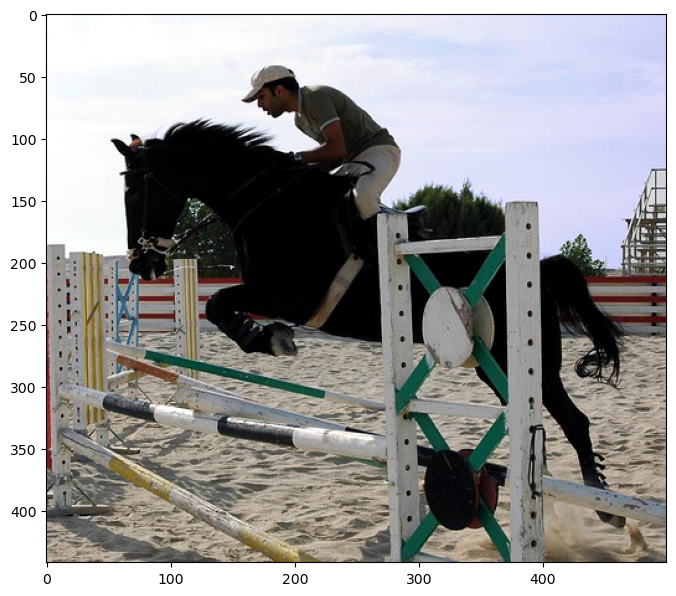

In [24]:
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread(os.path.join(Image_DIR, train_img_name))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [25]:
# 전체 데이터셋 전처리 과정 - CustomDataset 생성하기
# 참고 : https://velog.io/@tbvjvsladla/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-%EA%B3%A0%EA%B8%89%EC%8B%9C%EA%B0%81-%EA%B0%95%EC%9D%98-%EC%98%88%EC%8A%B5-19.-Yolo-v1-3-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-Pascal-VOC-2007

In [26]:
print(train_dataset)
print(len(train_dataset))
print(len(test_dataset))

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: PascalVOC2012/
5717
5823


### 중요!! AI Class 기본 메서드 : \__init__, \__len__, \__getitem__

\__init__ : 클래스를 생성할 때 실행되는 생성자<br>
\__len__ : 원소의 개수를 셀 때 접근되는 메서드<br>
\__getitem__ : 인덱스에 접근할 때 호출되는 메소드

[EX]
~~~python
class Test:
    def __init__(self) :
        print("TEST 함수 실행")
        self.numbers = [i for i in range(10)]
    def __len__(self) :
        return len(self.numbers)
    def __getitem__(self, idx) :
        return self.numbers[idx]
~~~

T = Test() : TEST 함수 실행<br>
len(T) : 10<br>
T[3] : 3

In [27]:
class Test:
    def __init__(self) :
        print("TEST 함수 실행")
        self.numbers = [i for i in range(10)]
        self.array = [1,2,3,4]
    def __len__(self) :
        return len(self.numbers)
    def __getitem__(self, idx) :
        print(f"전체 길이 : {len(self)}")
        return self.numbers[idx], self.array

In [28]:
T = Test()
T[3]

TEST 함수 실행
전체 길이 : 10


(3, [1, 2, 3, 4])

In [1]:
# 2. Grid-Based Object Detection with Pascal 2012 VOC Datasets

In [2]:
# import libraries

import torchvision
import torch
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_tensor, to_pil_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import tensorflow as tf
import cv2 as cv
import random
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET # 이걸 이용해 파싱

2025-04-08 05:15:43.158106: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-08 05:15:43.165655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744056943.177677   39211 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744056943.180760   39211 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744056943.189836   39211 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744056943.189845   39211 computation_placer.cc:177] computation placer already registered. Please che

In [3]:
class CustomVOCDataset(Dataset):
    def __init__(self, root, image_set=None, transform=None) :
        self.root = root #PascalVOC 메인폴더의 경로
        # Main폴더의 4개 텍스트 파일로 설정할 모드(test, train, val, trainval)
        self.image_set = image_set 
        self.transform = transform

        # 경로 변수
        self.voc_root = os.path.join(root, 'VOCdevkit', 'VOC2012')
        self.annotation_path = os.path.join(root, 'VOCdevkit', 'VOC2012', 'Annotations')
        self.image_path = os.path.join(root, 'VOCdevkit', 'VOC2012', 'JPEGImages')
        self.split_file = os.path.join(self.voc_root, 'ImageSets', 'Main', image_set + '.txt')

        # 이미지 ID 목록 읽기
        with open(self.split_file) as f:
            file_ids = [line.strip() for line in f.readlines()]

        # 관심 클래스 정의
        self.target_classes = ['aeroplane', 'bicycle', 'bus', 'car', 'cat']
        
        # 파일 내에 있는 모든 object Element를 찾음.
        self.filtered_annotations_path = []
        self.filtered_images_path = []

        for file_id in file_ids :
            anno_path = os.path.join(self.annotation_path, file_id + '.xml')
            img_path = os.path.join(self.image_path, file_id + '.jpg')

            tree = ET.parse(anno_path)
            root = tree.getroot()
            objects = root.findall('object')

            # 클래스 필터링
            for obj in objects:
                class_name = obj.find('name').text
                if class_name in self.target_classes:
                    self.filtered_images_path.append(img_path)
                    self.filtered_annotations_path.append(anno_path)
                    break  # 하나라도 포함되면 그 이미지는 사용
        
    def __len__(self):
        return len(self.filtered_images_path)

    # target_classes에 대해서 바운딩 박스의 좌표, 클래스 인덱스, 총 객체의 수를 가져오는 함수
    def selected_parse_voc_xml(self, node):
        target_classes = ['aeroplane', 'bicycle', 'bus', 'car', 'cat']
        selected_boxes = []
        
        for obj in node.findall('object'):
            class_name = obj.find('name').text

            if class_name in target_classes :
                class_idx = target_classes.index(class_name)
                xml_box = obj.find('bndbox') 
                x1 = int(xml_box.find('xmin').text)
                y1 = int(xml_box.find('ymin').text)
                x2 = int(xml_box.find('xmax').text)
                y2 = int(xml_box.find('ymax').text)
                selected_boxes.append((x1, y1, x2, y2, class_idx))
                
        return selected_boxes

    # 종횡비를 곱한 새로운 바운딩 박스의 좌표를 반환
    def resizing_bbox(self, boxes, width_ratio, height_ratio) :
        resized_bbox = []
        
        for box in boxes:
            x1 = box[0] * width_ratio
            y1 = box[1] * height_ratio
            x2 = box[2] * width_ratio
            y2 = box[3] * height_ratio
            resized_bbox.append((x1, y1, x2, y2, box[4]))
        return resized_bbox
        
    def __getitem__(self, idx):
        #모드에 맞춰 필터링된 이미지, Annotations 정보를 불러오기
        image_path = self.filtered_images_path[idx]
        annotation_path = self.filtered_annotations_path[idx]

        # confidence, coordinate, size, class 정보가 담길 라벨 배열의 선언
        H,W=256,256 
        GHN,GWN=8,8
        GH,GW=int(H/GHN),int(W/GWN)
        Mmax=5 # maximum number of objects
        
        label_conf=np.zeros([1,GHN,GWN],dtype=np.float32) # confidence 정보가 담길 배열
        label_coord=np.zeros([2,GHN,GWN],dtype=np.float32) # 정규화된 해당 객체의 중심 좌표가 담길 배열
        label_size=np.zeros([2,GHN,GWN],dtype=np.float32) # 정규화된 해당 객체의 크기 정보가 담길 배열
        label_class=np.zeros([1,GHN,GWN],dtype=np.float32) # 해당 객체의 클래스 정보가 담길 배열

        # 1. 이미지 불러오기 및 변환 적용
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        # 2. XML 파일에서 어노테이션 정보 불러오기
        #xml 처리용 라이브러리로 root에 xml 정보를 저장함
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        
        #root로 처리된 xml정보로부터 [B_Box용 xy좌표 + 클래스 종류]추출
        boxes = self.selected_parse_voc_xml(root)

        # 3. 새로운 이미지의 크기에 대한 종횡비를 원래의 바운당 박스 좌표에 곱해주기
        image_size = root.find('size') # -> 자식 중 size 찾음 
        original_image_width = int(image_size.find('width').text) # size 를 찾고 그 자식노드인 width 를 찾아야 함. 
        original_image_height = int(image_size.find('height').text) # size 를 찾고 그 자식노드인 height 를 찾아야 함.
        
        width_ratio = W / original_image_width
        height_ratio = H / original_image_height

        resized_boxes = self.resizing_bbox(boxes, width_ratio, height_ratio)

        # 4. label_conf, label_coord, label_size, label_class 배열에 값을 대입
        for resized_box in resized_boxes :
            x = int((resized_box[0] + resized_box[2]) / 2)
            y = int((resized_box[1] + resized_box[3]) / 2)

            i, j = int(x/GW), int(y/GH)
            bw = resized_box[2] - resized_box[0]
            bh = resized_box[3] - resized_box[1]
            
            label_conf[0,j,i] = 1
            label_coord[0:2,j,i] = ((x-i*GW)/GW),((y-j*GH)/GH) # Normalized
            label_size[0:2,j,i]=(bw/(W/4)),(bh/(H/4)) # Normalized
            label_class[0,j,i]=resized_box[4]
        
        return image, torch.from_numpy(label_conf), torch.from_numpy(label_coord), torch.from_numpy(label_size), torch.from_numpy(label_class)

### 중요!!!
v2.ToTensor()은 **이미지를 [H, W, C] -> [C, H, W]로 바꾸어 주는** 동시에, **이미지의 값을 0-255에서 0-1의 부동 소수점으로 정규화**하여 스케일링한다.

In [4]:
# 이미지 증강 없이 학습 진행

from torchvision.transforms import v2

transformation = v2.Compose([
    v2.Resize((256, 256)), #이미지 크기를 256, 256로
    v2.ToTensor(),  # 이미지를 Tensor 자료형으로 변환
])

# 전처리 방법론 적용
train_subset_dataset = CustomVOCDataset(root='PascalVOC2012/', image_set='train', transform=transformation)
test_subset_dataset = CustomVOCDataset(root='PascalVOC2012/', image_set='val', transform=transformation)

print(f"train dataset size : {len(train_subset_dataset)}")
print(f"test dataset size : {len(test_subset_dataset)}")

/home/jungseong/anaconda3/envs/vision/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


train dataset size : 1829
test dataset size : 1845


In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_loader = DataLoader(train_subset_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_loader = DataLoader(test_subset_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

In [6]:
# Debugging...

image0, label_conf0, label_coord0, label_size0, label_class0 = train_subset_dataset[4]
print(label_conf0)
print("===========")
print(label_coord0)
print("===========")
print(label_size0)
print("===========")
print(label_class0)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0625, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

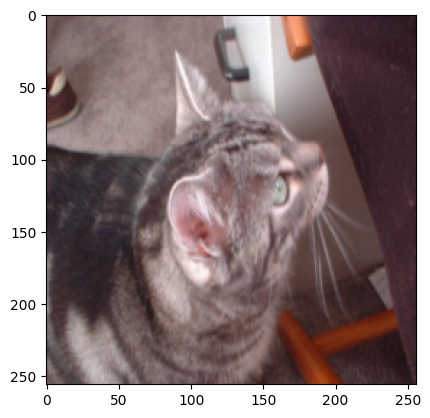

In [7]:
img_np = image0.permute(1, 2, 0).cpu().numpy().copy()
img_np = (img_np * 255).astype(np.uint8)  # (0~1) float → uint8
plt.imshow(img_np)

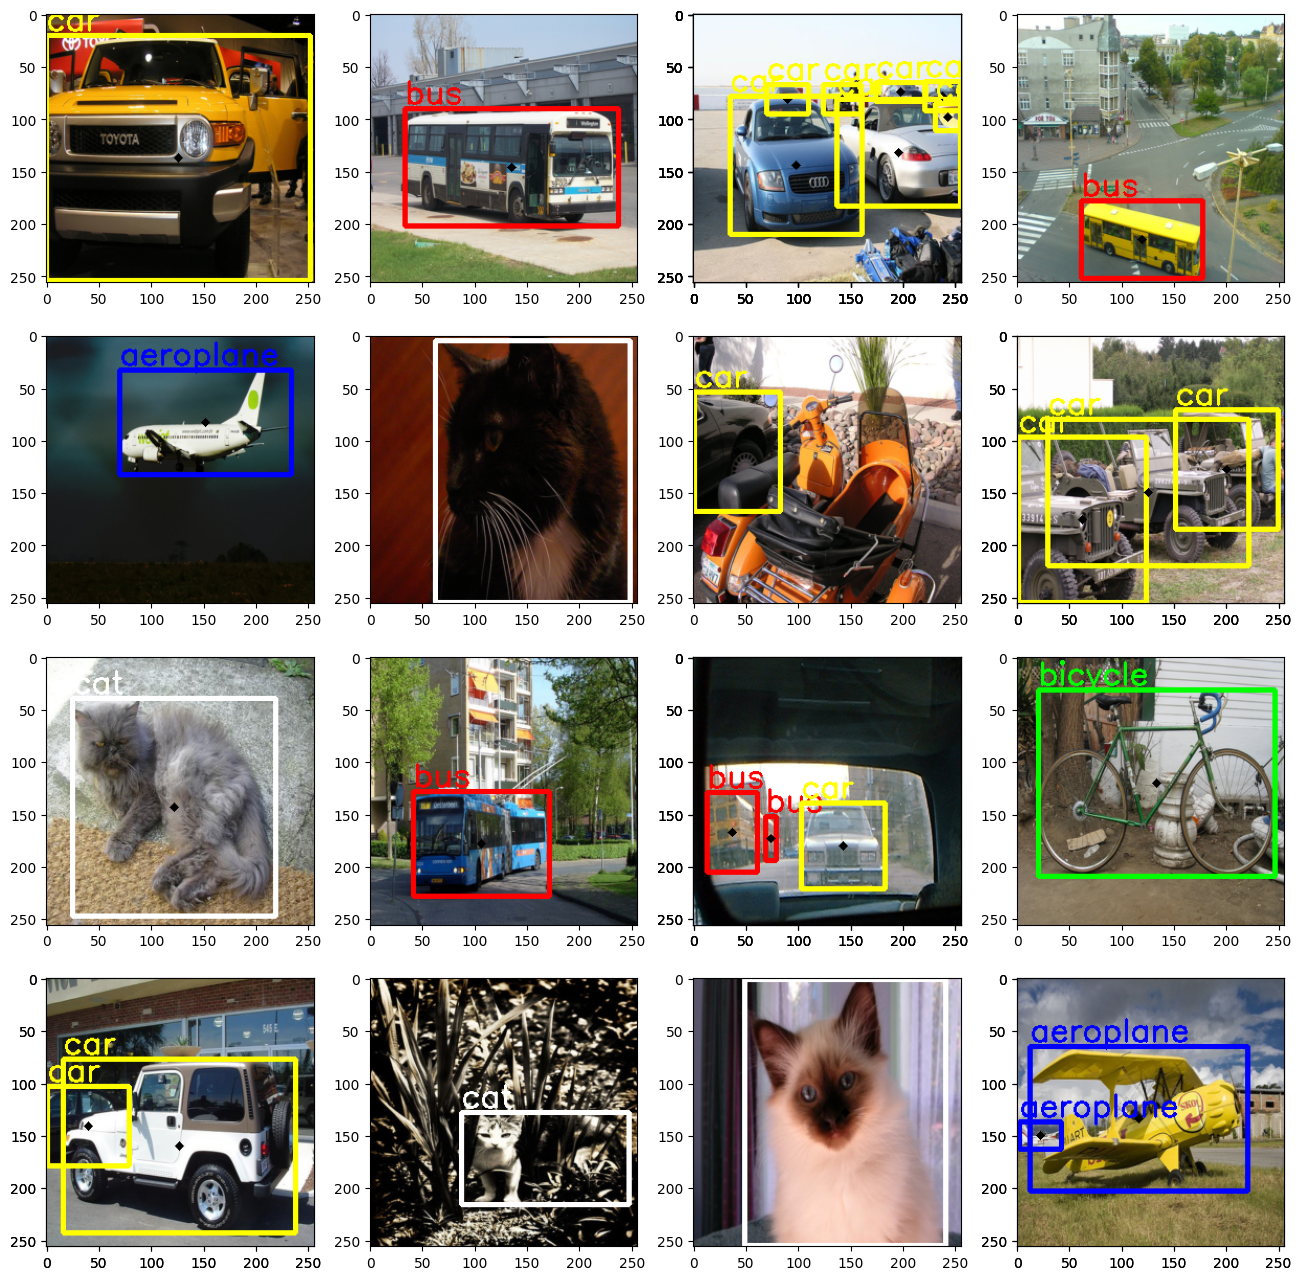

In [8]:
# train dataloader에 이미지가 잘 불러와 졌는지 확인하기
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import cv2

H,W=256,256 
GHN,GWN=8,8
GH,GW=int(H/GHN),int(W/GWN)
Mmax=5 # maximum number of objects

data_iter = iter(train_loader)
train_image, train_label_conf, train_label_coord, train_label_size, train_label_class = next(data_iter)

fig = plt.figure(figsize=(16,16))
rows=4
columns=4

for n in range(1, rows * columns + 1) :
    # Tensor → NumPy + 채널 순서 변경 (C,H,W) → (H,W,C)
    # permute() : 행렬의 차원을 맞교환 해주는 함수
    img_np = train_image[n-1].permute(1, 2, 0).cpu().numpy().copy()
    img_np = (img_np * 255).astype(np.uint8)  # (0~1) float → uint8
    for i in range (GWN) :
        for j in range (GHN) :
            if train_label_conf[n-1, 0, j, i] == 1 :
                x=int(i*GW+(train_label_coord[n-1,0,j,i]*GW))
                y=int(j*GH+(train_label_coord[n-1,1,j,i]*GH))
                bw=int(train_label_size[n-1,0,j,i]*(W/4))
                bh=int(train_label_size[n-1,1,j,i]*(H/4))
                obj_class=train_label_class[n-1,:,j,i]

                if obj_class==0: # aeroplane - blue
                    cv.rectangle(img_np,(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),color=(0,0,255),thickness=3)
                    cv2.putText(img_np, 'aeroplane', (x-int(bw/2), y-int(bh/2) - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), thickness=2)
                elif obj_class==1: # bicycle - green
                    cv.rectangle(img_np,(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)), color=(0,255,0),thickness=3)
                    cv2.putText(img_np, 'bicycle', (x-int(bw/2), y-int(bh/2) - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), thickness=2)
                elif obj_class==2: # bus- red
                    cv.rectangle(img_np,(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),color=(255,0,0),thickness=3)
                    cv2.putText(img_np, 'bus', (x-int(bw/2), y-int(bh/2) - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), thickness=2)
                elif obj_class==3: # car - yellow
                    cv.rectangle(img_np,(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),color=(255,255,0),thickness=3)
                    cv2.putText(img_np, 'car', (x-int(bw/2), y-int(bh/2) - 5), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,0), thickness=2)
                else : # cat - white
                    cv.rectangle(img_np,(x-int(bw/2),y-int(bh/2)),(x+int(bw/2),y+int(bh/2)),color=(255,255,255),thickness=3)
                    cv2.putText(img_np, 'cat', (x-int(bw/2), y-int(bh/2) - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), thickness=2)
                    
                cv.circle(img_np,center=(x,y),radius=2,color=(0,0,0),thickness=3) # 해당 객체의 중앙을 표시
                
                fig.add_subplot(rows, columns, n)
                plt.imshow(img_np)

In [9]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device) # GPU를 사용할 수 있는지 확인

cuda:0


In [10]:
# Step 1. VGG16 모델을 이용한 학습

In [11]:
import torchvision.models as models
import torch.nn as nn

vgg16 = models.vgg16(pretrained=True)

# Feature extracting layers만 불러오기 (fc 제외)
vgg16 = nn.Sequential(*list(vgg16.children())[:-2])

for param in vgg16.parameters():
    param.requires_grad = False

print(vgg16)

/home/jungseong/anaconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jungseong/anaconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
import torch
import torch.nn as nn
import torchvision.models as models

class VGG16MultipleDetector(nn.Module):
    def __init__(self, in_channels):
        super(VGG16MultipleDetector, self).__init__()
        # 기존의 Resnet18 모델을 base model로써 사용
        self.backbone = vgg16
        
        self.out_conf = nn.Conv2d(in_channels, out_channels=1, kernel_size=1)
        self.out_coord = nn.Conv2d(in_channels, out_channels=2, kernel_size=1)
        self.out_size = nn.Conv2d(in_channels, out_channels=2, kernel_size=1)
        self.out_class = nn.Conv2d(in_channels, out_channels=5, kernel_size=1) # output class의 수가 5

    def forward(self, x):
        x = self.backbone(x)
        out_conf = torch.sigmoid(self.out_conf(x))
        out_coord = torch.sigmoid(self.out_coord(x))
        out_size = torch.sigmoid(self.out_size(x))
        out_class = self.out_class(x)
        return out_conf, out_coord, out_size, out_class

my_model1 = VGG16MultipleDetector(512)
my_model1.to(device)

print(my_model1)

VGG16MultipleDetector(
  (backbone): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=T

## Custom Loss with Pytorch
**중요!!** 파이토치의 경우 [B, C, H, W]의 형태를 가지고 있음에 유의하며 손실 함수를 설계 하여야 한다 <br>
텐서플로우의 경우에는 [B, H, W, C]로 채널이 뒤에 있다

In [13]:
import torch
import torch.nn.functional as F

# conf: (B, 1, H, W)
def conf_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    noobj_mask = ~obj_mask

    sqrerr = (y_pred - y_true) ** 2
    loss_obj_conf = torch.mean(sqrerr[:, 0, :, :][obj_mask])
    loss_noobj_conf = torch.mean(sqrerr[:, 0, :, :][noobj_mask])
    return 5 * loss_obj_conf + 0.5 * loss_noobj_conf

# coord: (B, 2, H, W)
# y_true[:, 0, :, :]는 object mask, y_true[:, 1:3, :, :]는 x, y 좌표
def coord_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1 # (B, H, W)
    coord_gt = y_true[:, 1:3, :, :]  # (B, 2, H, W)
    loss = F.mse_loss(y_pred, coord_gt, reduction='none')  # (B, 2, H, W)
    
    mask = obj_mask.unsqueeze(1)  # (B, H, W) -> (B, 1, H, W)의 형태로 차원을 늘려줌
    masked_loss = loss * mask # 브로드 캐스팅 규칙에 의해 (B, 1, H, W) -> (B, 2, H, W)로 복제되어 element-wise 연산이 가능하다
    return masked_loss.sum() / mask.sum()  # 평균 over valid elements

# size: (B, 2, H, W)
def size_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    size_gt = y_true[:, 1:3, :, :]
    loss = F.mse_loss(y_pred, size_gt, reduction='none')  # (B, 2, H, W)
    
    mask = obj_mask.unsqueeze(1)
    masked_loss = loss * mask
    return masked_loss.sum() / mask.sum()


# class: (B, 5, H, W) → softmaxed already
# y_true[:, 0, :, :] is object mask, y_true[:, 1, :, :] is class index (long)
def class_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    class_gt = y_true[:, 1, :, :].long()
    loss = F.cross_entropy(y_pred, class_gt, reduction='none')

    mask = obj_mask.float()
    masked_loss = loss * mask
    return masked_loss.sum() / mask.sum()

## Custom Loss 클래스의 구현

In [14]:
class CustomLoss(torch.nn.Module):
    def __init__(self, weights=None):
        super().__init__()
        self.weights = weights or {
            'conf': 1,
            'coord': 1,
            'size': 1,
            'class': 1
        }

    def forward(self, out, target):
        out_conf, out_coord, out_size, out_class = out
        target_conf, target_coord, target_size, target_class = target

        loss_conf = conf_loss_func(out_conf, target_conf)
        loss_coord = coord_loss_func(out_coord, target_coord)
        loss_size = size_loss_func(out_size, target_size)
        loss_class = class_loss_func(out_class, target_class)

        total_loss = (
            self.weights['conf'] * loss_conf +
            self.weights['coord'] * loss_coord +
            self.weights['size'] * loss_size +
            self.weights['class'] * loss_class
        )

        return total_loss, {
            'conf': loss_conf,
            'coord': loss_coord,
            'size': loss_size,
            'class': loss_class
        }

In [15]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(my_model1.parameters(), lr=learning_rate)

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [16]:
# 하나의 배치에 대해서만 train_dataset을 학습해 봤음에도, loss가 잘 떨어지지 않는다

num_epochs = 2000

train_total_loss_list = []
train_label_conf_loss_list = []
train_label_coord_loss_list = []
train_label_size_loss_list = []
train_label_class_loss_list = []

loss_fn = CustomLoss()

for epoch in range(num_epochs):
    my_model1.train() # VGG16을 backbone으로 사용한 모델을 train
    
    epoch_total_loss = 0.0
    epoch_conf_loss = 0.0
    epoch_coord_loss = 0.0
    epoch_size_loss = 0.0
    epoch_class_loss = 0.0

    cnt = 0

    images, label_conf, label_coord, label_size, label_class = next(iter(train_loader))
    images = images.to(device)
    label_conf = label_conf.to(device)
    label_coord = label_coord.to(device)
    label_size = label_size.to(device)
    label_class = label_class.to(device)
    
    out_conf, out_coord, out_size, out_class = my_model1(images) 
    
    total_loss, loss_dict = loss_fn(
        (out_conf, out_coord, out_size, out_class),
        (
            label_conf,
            torch.cat([label_conf, label_coord], dim=1),
            torch.cat([label_conf, label_size], dim=1),
            torch.cat([label_conf, label_class], dim=1)
        )
    )

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # epoch 평균용 float만 따로 저장
    epoch_total_loss += total_loss.item()
    epoch_conf_loss += loss_dict['conf'].item()
    epoch_coord_loss += loss_dict['coord'].item()
    epoch_size_loss += loss_dict['size'].item()
    epoch_class_loss += loss_dict['class'].item()
    cnt += 1

    # 배치 개수로 평균
    train_total_loss_list.append(epoch_total_loss / cnt)
    train_label_conf_loss_list.append(epoch_conf_loss / cnt)
    train_label_coord_loss_list.append(epoch_coord_loss / cnt)
    train_label_size_loss_list.append(epoch_size_loss / cnt)
    train_label_class_loss_list.append(epoch_class_loss / cnt)

    if epoch % 50 == 0 : 
        print(f"[Epoch {epoch+1}] Avg Train Loss: {epoch_total_loss / cnt:.4f} | conf_loss: {epoch_conf_loss / cnt:.4f}, coord_loss: {epoch_coord_loss / cnt:.4f}, size_loss: {epoch_size_loss / cnt:.4f}, class_loss: {epoch_class_loss / cnt:.4f}")

[Epoch 1] Avg Train Loss: 11.4039 | conf_loss: 1.7101, coord_loss: 0.2392, size_loss: 7.6897, class_loss: 1.7650
[Epoch 51] Avg Train Loss: 8.1834 | conf_loss: 0.4290, coord_loss: 0.2084, size_loss: 6.9959, class_loss: 0.5501
[Epoch 101] Avg Train Loss: 4.2244 | conf_loss: 0.3903, coord_loss: 0.1571, size_loss: 2.9775, class_loss: 0.6994
[Epoch 151] Avg Train Loss: 5.3725 | conf_loss: 0.3118, coord_loss: 0.1809, size_loss: 4.3681, class_loss: 0.5117
[Epoch 201] Avg Train Loss: 4.8106 | conf_loss: 0.3163, coord_loss: 0.1838, size_loss: 4.0141, class_loss: 0.2964
[Epoch 251] Avg Train Loss: 5.5387 | conf_loss: 0.2766, coord_loss: 0.1727, size_loss: 4.7676, class_loss: 0.3218
[Epoch 301] Avg Train Loss: 6.2039 | conf_loss: 0.3623, coord_loss: 0.1399, size_loss: 5.1395, class_loss: 0.5623
[Epoch 351] Avg Train Loss: 4.7794 | conf_loss: 0.3010, coord_loss: 0.1570, size_loss: 3.7465, class_loss: 0.5748
[Epoch 401] Avg Train Loss: 3.7990 | conf_loss: 0.3384, coord_loss: 0.1038, size_loss: 2.9

In [17]:
# Step 2. ResNet18 모델을 이용한 학습

In [18]:
import torchvision.models as models
import torch.nn as nn

resnet18 = models.resnet18(pretrained=True)

# Feature extracting layers만 불러오기 (fc 제외)
resnet18 = nn.Sequential(*list(resnet18.children())[:-2])

for param in resnet18.parameters():
    param.requires_grad = False

print(resnet18)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

/home/jungseong/anaconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
import torch
import torch.nn as nn
import torchvision.models as models

class ResNet18MultipleDetector(nn.Module):
    def __init__(self, in_channels):
        super(ResNet18MultipleDetector, self).__init__()
        # 기존의 Resnet18 모델을 base model로써 사용
        self.backbone = resnet18
        
        self.out_conf = nn.Conv2d(in_channels, out_channels=1, kernel_size=1)
        self.out_coord = nn.Conv2d(in_channels, out_channels=2, kernel_size=1)
        self.out_size = nn.Conv2d(in_channels, out_channels=2, kernel_size=1)
        self.out_class = nn.Conv2d(in_channels, out_channels=5, kernel_size=1) # output class의 수가 5

    def forward(self, x):
        x = self.backbone(x)
        out_conf = torch.sigmoid(self.out_conf(x))
        out_coord = torch.sigmoid(self.out_coord(x))
        out_size = torch.sigmoid(self.out_size(x))
        out_class = self.out_class(x)
        return out_conf, out_coord, out_size, out_class

my_model2 = ResNet18MultipleDetector(512)
my_model2.to(device)

print(my_model2)

ResNet18MultipleDetector(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

## Custom Loss with Pytorch
**중요!!** 파이토치의 경우 [B, C, H, W]의 형태를 가지고 있음에 유의하며 손실 함수를 설계 하여야 한다 <br>
텐서플로우의 경우에는 [B, H, W, C]로 채널이 뒤에 있다

In [20]:
import torch
import torch.nn.functional as F

# conf: (B, 1, H, W)
def conf_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    noobj_mask = ~obj_mask

    sqrerr = (y_pred - y_true) ** 2
    loss_obj_conf = torch.mean(sqrerr[:, 0, :, :][obj_mask])
    loss_noobj_conf = torch.mean(sqrerr[:, 0, :, :][noobj_mask])
    return 5 * loss_obj_conf + 0.5 * loss_noobj_conf

# coord: (B, 2, H, W)
# y_true[:, 0, :, :]는 object mask, y_true[:, 1:3, :, :]는 x, y 좌표
def coord_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1 # (B, H, W)
    coord_gt = y_true[:, 1:3, :, :]  # (B, 2, H, W)
    loss = F.mse_loss(y_pred, coord_gt, reduction='none')  # (B, 2, H, W)
    
    mask = obj_mask.unsqueeze(1)  # (B, H, W) -> (B, 1, H, W)의 형태로 차원을 늘려줌
    masked_loss = loss * mask # 브로드 캐스팅 규칙에 의해 (B, 1, H, W) -> (B, 2, H, W)로 복제되어 element-wise 연산이 가능하다
    return masked_loss.sum() / mask.sum()  # 평균 over valid elements

# size: (B, 2, H, W)
def size_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    size_gt = y_true[:, 1:3, :, :]
    loss = F.mse_loss(y_pred, size_gt, reduction='none')  # (B, 2, H, W)
    
    mask = obj_mask.unsqueeze(1)
    masked_loss = loss * mask
    return masked_loss.sum() / mask.sum()


# class: (B, 5, H, W) → softmaxed already
# y_true[:, 0, :, :] is object mask, y_true[:, 1, :, :] is class index (long)
def class_loss_func(y_pred, y_true):
    obj_mask = y_true[:, 0, :, :] == 1
    class_gt = y_true[:, 1, :, :].long()
    loss = F.cross_entropy(y_pred, class_gt, reduction='none')

    mask = obj_mask.float()
    masked_loss = loss * mask
    return masked_loss.sum() / mask.sum()

## Custom Loss 클래스의 구현

In [21]:
class CustomLoss(torch.nn.Module):
    def __init__(self, weights=None):
        super().__init__()
        self.weights = weights or {
            'conf': 1,
            'coord': 1,
            'size': 1,
            'class': 1
        }

    def forward(self, out, target):
        out_conf, out_coord, out_size, out_class = out
        target_conf, target_coord, target_size, target_class = target

        loss_conf = conf_loss_func(out_conf, target_conf)
        loss_coord = coord_loss_func(out_coord, target_coord)
        loss_size = size_loss_func(out_size, target_size)
        loss_class = class_loss_func(out_class, target_class)

        total_loss = (
            self.weights['conf'] * loss_conf +
            self.weights['coord'] * loss_coord +
            self.weights['size'] * loss_size +
            self.weights['class'] * loss_class
        )

        return total_loss, {
            'conf': loss_conf,
            'coord': loss_coord,
            'size': loss_size,
            'class': loss_class
        }

In [22]:
# Initial Loss 체크하기

# 샘플 데이터 가져오기
images, label_conf, label_coord, label_size, label_class = next(iter(train_loader))
images, label_conf, label_coord, label_size, label_class= images.to(device), label_conf.to(device), label_coord.to(device), label_size.to(device), label_class.to(device)

train = images.view(-1, 3, 256, 256)
loss_fn = CustomLoss()

# 모델의 초기 예측
out_conf, out_coord, out_size, out_class = my_model2(train)

initial_total_loss, initial_label_loss_dict = loss_fn(
            (out_conf, out_coord, out_size, out_class), # predicted labels
            (label_conf,
             torch.cat([label_conf, label_coord], dim=1),
             torch.cat([label_conf, label_size], dim=1),
             torch.cat([label_conf, label_class], dim=1) # true labels
            )
        )

print(f"Initial Loss: {initial_total_loss}, {initial_label_loss_dict['conf']}, {initial_label_loss_dict['coord']}, {initial_label_loss_dict['size']}, {initial_label_loss_dict['class']}")

Initial Loss: 9.834539413452148, 1.9812431335449219, 0.3346850872039795, 5.270090579986572, 2.248520851135254


In [53]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(my_model2.parameters(), lr=learning_rate)

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [54]:
# 하나의 배치에 대해서만 train_dataset을 학습해 봤음에도, loss가 잘 떨어지지 않는다

num_epochs = 50

train_total_loss_list = []
train_label_conf_loss_list = []
train_label_coord_loss_list = []
train_label_size_loss_list = []
train_label_class_loss_list = []

loss_fn = CustomLoss()

for epoch in range(num_epochs):
    my_model2.train() # ResNet18을 backbone으로 사용한 모델을 train
    
    epoch_total_loss = 0.0
    epoch_conf_loss = 0.0
    epoch_coord_loss = 0.0
    epoch_size_loss = 0.0
    epoch_class_loss = 0.0

    cnt = 0

    images, label_conf, label_coord, label_size, label_class = next(iter(train_loader))
    images = images.to(device)
    label_conf = label_conf.to(device)
    label_coord = label_coord.to(device)
    label_size = label_size.to(device)
    label_class = label_class.to(device)
    
    out_conf, out_coord, out_size, out_class = my_model2(images) 
    
    total_loss, loss_dict = loss_fn(
        (out_conf, out_coord, out_size, out_class),
        (
            label_conf,
            torch.cat([label_conf, label_coord], dim=1),
            torch.cat([label_conf, label_size], dim=1),
            torch.cat([label_conf, label_class], dim=1)
        )
    )

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # epoch 평균용 float만 따로 저장
    epoch_total_loss += total_loss.item()
    epoch_conf_loss += loss_dict['conf'].item()
    epoch_coord_loss += loss_dict['coord'].item()
    epoch_size_loss += loss_dict['size'].item()
    epoch_class_loss += loss_dict['class'].item()
    cnt += 1

    # 배치 개수로 평균
    train_total_loss_list.append(epoch_total_loss / cnt)
    train_label_conf_loss_list.append(epoch_conf_loss / cnt)
    train_label_coord_loss_list.append(epoch_coord_loss / cnt)
    train_label_size_loss_list.append(epoch_size_loss / cnt)
    train_label_class_loss_list.append(epoch_class_loss / cnt)

    print(f"[Epoch {epoch+1}] Avg Train Loss: {epoch_total_loss / cnt:.4f} | conf_loss: {epoch_conf_loss / cnt:.4f}, coord_loss: {epoch_coord_loss / cnt:.4f}, size_loss: {epoch_size_loss / cnt:.4f}, class_loss: {epoch_class_loss / cnt:.4f}")

[Epoch 1] Avg Train Loss: 6.9265 | conf_loss: 0.4067, coord_loss: 0.3036, size_loss: 5.5912, class_loss: 0.6251
[Epoch 2] Avg Train Loss: 5.8210 | conf_loss: 0.3822, coord_loss: 0.2987, size_loss: 4.4250, class_loss: 0.7151
[Epoch 3] Avg Train Loss: 5.2665 | conf_loss: 0.3775, coord_loss: 0.1716, size_loss: 3.7010, class_loss: 1.0165
[Epoch 4] Avg Train Loss: 7.2237 | conf_loss: 0.3630, coord_loss: 0.2817, size_loss: 5.8243, class_loss: 0.7547
[Epoch 5] Avg Train Loss: 5.6752 | conf_loss: 0.4061, coord_loss: 0.1852, size_loss: 4.5298, class_loss: 0.5541
[Epoch 6] Avg Train Loss: 5.4261 | conf_loss: 0.4162, coord_loss: 0.2744, size_loss: 4.1767, class_loss: 0.5588
[Epoch 7] Avg Train Loss: 4.8124 | conf_loss: 0.3798, coord_loss: 0.3393, size_loss: 3.2762, class_loss: 0.8172
[Epoch 8] Avg Train Loss: 5.2421 | conf_loss: 0.3880, coord_loss: 0.2403, size_loss: 3.9208, class_loss: 0.6931
[Epoch 9] Avg Train Loss: 7.1082 | conf_loss: 0.3868, coord_loss: 0.1709, size_loss: 6.1455, class_loss:

In [36]:
num_epochs = 20

train_total_loss_list = []
train_label_conf_loss_list = []
train_label_coord_loss_list = []
train_label_size_loss_list = []
train_label_class_loss_list = []

loss_fn = CustomLoss()

for epoch in range(num_epochs):
    my_model.train()
    
    epoch_total_loss = 0.0
    epoch_conf_loss = 0.0
    epoch_coord_loss = 0.0
    epoch_size_loss = 0.0
    epoch_class_loss = 0.0

    cnt = 0

    for images, label_conf, label_coord, label_size, label_class in train_loader:
        images = images.to(device)
        label_conf = label_conf.to(device)
        label_coord = label_coord.to(device)
        label_size = label_size.to(device)
        label_class = label_class.to(device)
        
        out_conf, out_coord, out_size, out_class = my_model(images)
        
        total_loss, loss_dict = loss_fn(
            (out_conf, out_coord, out_size, out_class),
            (
                label_conf,
                torch.cat([label_conf, label_coord], dim=1),
                torch.cat([label_conf, label_size], dim=1),
                torch.cat([label_conf, label_class], dim=1)
            )
        )

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # epoch 평균용 float만 따로 저장
        epoch_total_loss += total_loss.item()
        epoch_conf_loss += loss_dict['conf'].item()
        epoch_coord_loss += loss_dict['coord'].item()
        epoch_size_loss += loss_dict['size'].item()
        epoch_class_loss += loss_dict['class'].item()
        cnt += 1

    # 배치 개수로 평균
    train_total_loss_list.append(epoch_total_loss / cnt)
    train_label_conf_loss_list.append(epoch_conf_loss / cnt)
    train_label_coord_loss_list.append(epoch_coord_loss / cnt)
    train_label_size_loss_list.append(epoch_size_loss / cnt)
    train_label_class_loss_list.append(epoch_class_loss / cnt)

    print(f"[Epoch {epoch+1}] Avg Train Loss: {epoch_total_loss / cnt:.4f} | conf_loss: {epoch_conf_loss / cnt:.4f}, coord_loss: {epoch_coord_loss / cnt:.4f}, size_loss: {epoch_size_loss / cnt:.4f}, class_loss: {epoch_class_loss / cnt:.4f}")

[Epoch 1] Avg Train Loss: 11.2309 | conf: 0.3438, coord: 0.2189, size: 4.4549, class: 0.4141
[Epoch 2] Avg Train Loss: 11.0683 | conf: 0.3206, coord: 0.2005, size: 4.4762, class: 0.3524
[Epoch 3] Avg Train Loss: 10.9692 | conf: 0.3115, coord: 0.1909, size: 4.4768, class: 0.3177
[Epoch 4] Avg Train Loss: 10.7963 | conf: 0.3044, coord: 0.1830, size: 4.4301, class: 0.2907
[Epoch 5] Avg Train Loss: 10.7223 | conf: 0.2935, coord: 0.1796, size: 4.4269, class: 0.2695
[Epoch 6] Avg Train Loss: 10.6595 | conf: 0.2917, coord: 0.1756, size: 4.4018, class: 0.2782
[Epoch 7] Avg Train Loss: 10.5936 | conf: 0.2886, coord: 0.1738, size: 4.3935, class: 0.2458
[Epoch 8] Avg Train Loss: 10.6530 | conf: 0.2878, coord: 0.1703, size: 4.4340, class: 0.2405
[Epoch 9] Avg Train Loss: 10.6129 | conf: 0.2843, coord: 0.1700, size: 4.4182, class: 0.2438
[Epoch 10] Avg Train Loss: 10.6940 | conf: 0.2821, coord: 0.1666, size: 4.4724, class: 0.2367
[Epoch 11] Avg Train Loss: 10.5438 | conf: 0.2784, coord: 0.1678, siz

In [37]:
class CustomLoss(torch.nn.Module):
    def __init__(self, weights=None):
        super().__init__()
        self.weights = weights or {
            'conf': 3,
            'coord': 4,
            'size': 10,
            'class': 4
        }

    def forward(self, out, target):
        out_conf, out_coord, out_size, out_class = out
        target_conf, target_coord, target_size, target_class = target

        loss_conf = conf_loss_func(out_conf, target_conf)
        loss_coord = coord_loss_func(out_coord, target_coord)
        loss_size = size_loss_func(out_size, target_size)
        loss_class = class_loss_func(out_class, target_class)

        total_loss = (
            self.weights['conf'] * loss_conf +
            self.weights['coord'] * loss_coord +
            self.weights['size'] * loss_size +
            self.weights['class'] * loss_class
        )

        return total_loss, {
            'conf': loss_conf,
            'coord': loss_coord,
            'size': loss_size,
            'class': loss_class
        }

In [38]:
num_epochs = 50

train_total_loss_list = []
train_label_conf_loss_list = []
train_label_coord_loss_list = []
train_label_size_loss_list = []
train_label_class_loss_list = []

loss_fn = CustomLoss()

for epoch in range(num_epochs):
    my_model.train()
    
    epoch_total_loss = 0.0
    epoch_conf_loss = 0.0
    epoch_coord_loss = 0.0
    epoch_size_loss = 0.0
    epoch_class_loss = 0.0

    cnt = 0

    for images, label_conf, label_coord, label_size, label_class in train_loader:
        images = images.to(device)
        label_conf = label_conf.to(device)
        label_coord = label_coord.to(device)
        label_size = label_size.to(device)
        label_class = label_class.to(device)
        
        out_conf, out_coord, out_size, out_class = my_model(images)
        
        total_loss, loss_dict = loss_fn(
            (out_conf, out_coord, out_size, out_class),
            (
                label_conf,
                torch.cat([label_conf, label_coord], dim=1),
                torch.cat([label_conf, label_size], dim=1),
                torch.cat([label_conf, label_class], dim=1)
            )
        )

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # epoch 평균용 float만 따로 저장
        epoch_total_loss += total_loss.item()
        epoch_conf_loss += loss_dict['conf'].item()
        epoch_coord_loss += loss_dict['coord'].item()
        epoch_size_loss += loss_dict['size'].item()
        epoch_class_loss += loss_dict['class'].item()
        cnt += 1

    # 배치 개수로 평균
    train_total_loss_list.append(epoch_total_loss / cnt)
    train_label_conf_loss_list.append(epoch_conf_loss / cnt)
    train_label_coord_loss_list.append(epoch_coord_loss / cnt)
    train_label_size_loss_list.append(epoch_size_loss / cnt)
    train_label_class_loss_list.append(epoch_class_loss / cnt)

    print(f"[Epoch {epoch+1}] Avg Train Loss: {epoch_total_loss / cnt:.4f} | conf_loss: {epoch_conf_loss / cnt:.4f}, coord_loss: {epoch_coord_loss / cnt:.4f}, size_loss: {epoch_size_loss / cnt:.4f}, class_loss: {epoch_class_loss / cnt:.4f}")


[Epoch 1] Avg Train Loss: 46.4438 | conf_loss: 0.2664, coord_loss: 0.1588, size_loss: 4.4041, class_loss: 0.2420
[Epoch 2] Avg Train Loss: 46.5600 | conf_loss: 0.2671, coord_loss: 0.1592, size_loss: 4.4207, class_loss: 0.2286
[Epoch 3] Avg Train Loss: 46.0740 | conf_loss: 0.2733, coord_loss: 0.1616, size_loss: 4.3749, class_loss: 0.2146
[Epoch 4] Avg Train Loss: 45.5264 | conf_loss: 0.2665, coord_loss: 0.1573, size_loss: 4.3374, class_loss: 0.1810
[Epoch 5] Avg Train Loss: 46.3871 | conf_loss: 0.2668, coord_loss: 0.1587, size_loss: 4.4233, class_loss: 0.1798
[Epoch 6] Avg Train Loss: 45.9494 | conf_loss: 0.2686, coord_loss: 0.1606, size_loss: 4.3835, class_loss: 0.1665
[Epoch 7] Avg Train Loss: 46.6492 | conf_loss: 0.2621, coord_loss: 0.1562, size_loss: 4.4557, class_loss: 0.1704
[Epoch 8] Avg Train Loss: 46.5606 | conf_loss: 0.2634, coord_loss: 0.1592, size_loss: 4.4507, class_loss: 0.1566
[Epoch 9] Avg Train Loss: 45.7104 | conf_loss: 0.2653, coord_loss: 0.1582, size_loss: 4.3599, cl

KeyboardInterrupt: 

In [ ]:
num_epochs = 20
count = 0
train_loss_list = []
test_loss_list = []

train_accuracy_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    train_loss_epoch = 0
    test_loss_epoch = 0
    train_correct = 0
    train_total = 0

    loss_fn = CustomLoss()
    
    # Training Phase
    my_model.train()  # 모델을 학습 모드로 설정
    
    for images, label_conf, label_coord, label_size, label_class in train_loader:
        images, label_conf, label_coord, label_size, label_class= images.to(device), label_conf.to(device),
        label_coord.to(device), label_size.to(device), label_class.to(device)
        train = images.view(-1, 3, 256, 256)
        
        outputs = my_model(train)
        
         total_loss, label_dict = loss_fn(
            (out_conf, out_coord, out_size, out_class),
            (label_conf, label_coord, label_size, label_class)
        )

        train_predictions = torch.max(outputs, 1)[1]
        train_correct += (train_predictions == labels).sum().item()
        train_total += labels.size(0)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_epoch += loss.item()  # 미니배치 손실 합산

    # Validation Phase
    my_model.eval()  # 모델을 평가 모드로 설정 (Dropout 등 비활성화)
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():  # 기울기 업데이트 비활성화 (메모리 절약)
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            test = images.view(-1, 3, 32, 32)
            outputs = my_model(test)
            
            loss = criterion(outputs, labels)
            test_loss_epoch += loss.item()  # 미니배치 손실 합산
            
            test_predictions = torch.max(outputs, 1)[1]
            test_correct += (test_predictions == labels).sum().item()
            test_total += labels.size(0)

    train_accuracy = train_correct * 100 / train_total
    test_accuracy = test_correct * 100 / test_total

    train_loss_list.append(train_loss_epoch / len(train_loader))  # 평균 손실 저장
    test_loss_list.append(test_loss_epoch / len(test_loader))  # 평균 손실 저장

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

    print(f"Epoch {epoch+1}, Train_Accuracy: {train_accuracy}%, Test_Accuracy: {test_accuracy}%")